# **Importaciones**

In [30]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# desactiva las advertencias
warnings.filterwarnings('ignore')

# Importar librerias para modelado de clasificación
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Metricas de evaluación
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Importar librerias para normalización de datos
from sklearn.preprocessing import StandardScaler

# Importar librerias para validación cruzada
from sklearn.model_selection import cross_val_score

# Importar librerias para optimización de hiperparámetros
from sklearn.model_selection import GridSearchCV

# Importar librerias para algoritmos de clasificación
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [31]:
# Cargar dataset
df = pd.read_csv('diabetes_prediction_dataset.csv')

# Visualizar primeras filas
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [32]:
# Ver información del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [33]:
# Ver estadísticas descriptivas
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [34]:
# Ver valores nulos
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [35]:

# Ver valores únicos
df.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

In [36]:

# Ver forma de los datos
df.shape

(100000, 9)

# **Análisis Exploratorio de Datos (EDA)**

In [37]:
# Configurar graficos modernos son tamaño y letra
plt.rcParams['figure.figsize'] = [6, 4]

# Configurar estilo de los graficos ggplot
plt.style.use('default')  # estilo seaborn moderno

# Configurar paleta de colores
sns.set_palette('viridis')

# Configurar letra
plt.rcParams['font.size'] = 12

# Configurar fuente tipografica de letra
plt.rcParams['font.family'] = 'Palatino Linotype'

# Configurar paleta de colores
sns.set_palette('viridis')

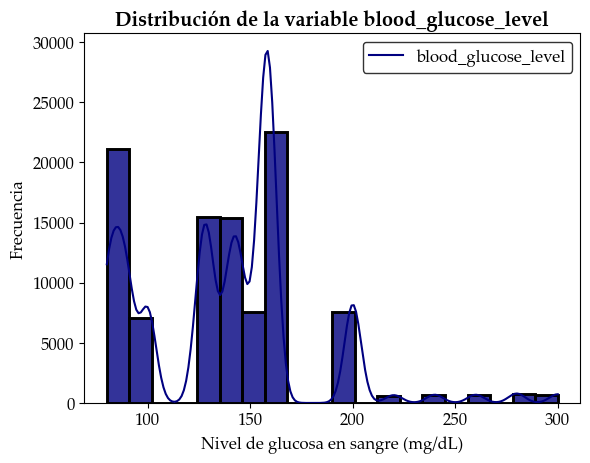

In [27]:
# Histograma de la variable blood_glucose_level con matplotlib
sns.histplot(df['blood_glucose_level'], kde=True, alpha=0.8, bins=20, color='navy', linewidth=2.1, edgecolor='black')
plt.title('Distribución de la variable blood_glucose_level', fontweight='bold')
plt.xlabel('Nivel de glucosa en sangre (mg/dL)')
plt.ylabel('Frecuencia')
# Leyenda con fondo de color contraste
plt.legend(['blood_glucose_level'], loc = 'upper right', frameon = True, facecolor = 'white', edgecolor = 'black')
plt.show()

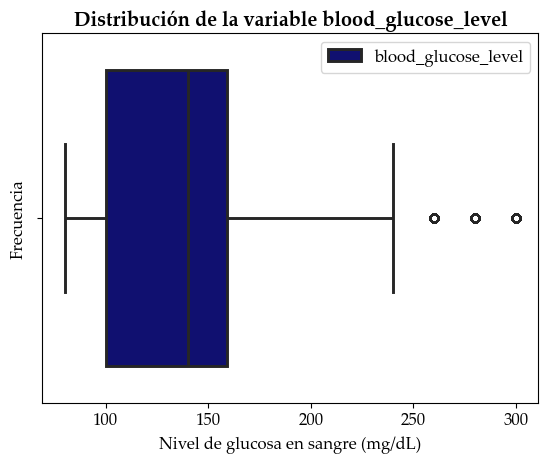

In [28]:
# Grafico de cajas de la variable blood_glucose_level con seaborn
sns.boxplot(x='blood_glucose_level', data=df, color='navy', linewidth=2.1)
plt.title('Distribución de la variable blood_glucose_level', fontweight='bold')
plt.xlabel('Nivel de glucosa en sangre (mg/dL)')
plt.ylabel('Frecuencia')
plt.legend(['blood_glucose_level'], loc = 'upper right')
plt.show()

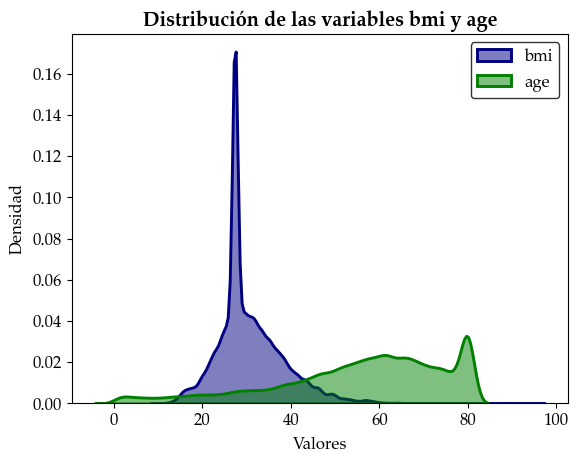

In [75]:
# 2 graficos de densidad de bmi y age con seaborn
sns.kdeplot(df['bmi'], color='navy', linewidth=2.1, fill=True, alpha = 0.5)
sns.kdeplot(df['age'], color='green', linewidth=2.1, fill=True, alpha = 0.5)
plt.title('Distribución de las variables bmi y age', fontweight='bold')
plt.xlabel('Valores')
plt.ylabel('Densidad')
plt.legend(['bmi', 'age'], loc = 'upper right', frameon = True, facecolor = 'white', edgecolor = 'black')
plt.show()

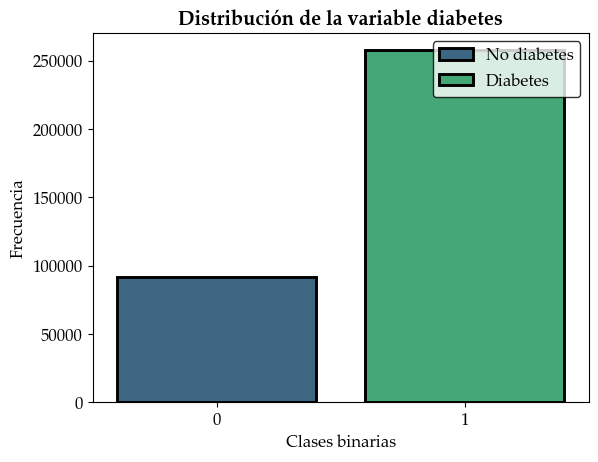

In [76]:
# Grafico de barras de la variable diabetes con seaborn
sns.countplot(x='diabetes', data=df, palette='viridis', edgecolor='black', linewidth=2.1)
plt.title('Distribución de la variable diabetes', fontweight='bold')
plt.xlabel('Clases binarias')
plt.ylabel('Frecuencia')
plt.legend(['No diabetes', 'Diabetes'], loc = 'upper right', frameon = True, facecolor = 'white', edgecolor = 'black')
plt.show()

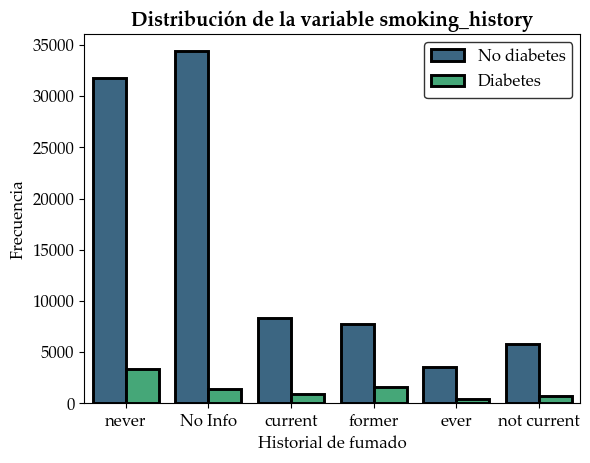

In [39]:
# Grafico de barras moderno de smoking_history
sns.countplot(x='smoking_history', data=df, palette='viridis', hue='diabetes', dodge=True, linewidth=2.1, edgecolor='black')
plt.title('Distribución de la variable smoking_history', fontweight='bold')
plt.xlabel('Historial de fumado')
plt.ylabel('Frecuencia')
plt.legend(['No diabetes', 'Diabetes'], loc = 'upper right', frameon = True, facecolor = 'white', edgecolor = 'black')
plt.show()


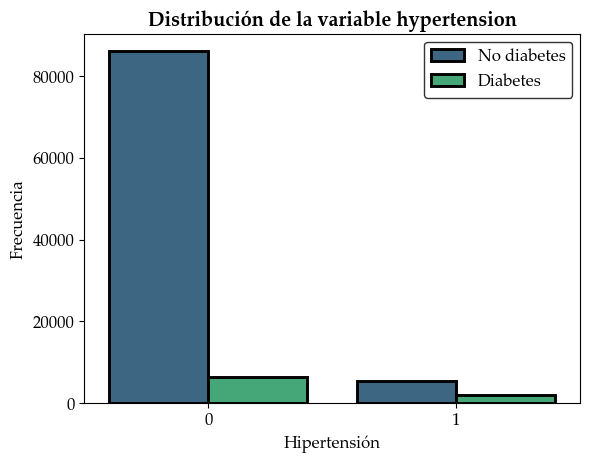

In [40]:
# Grafico de barras de las variables hypertension y heart_disease
sns.countplot(x='hypertension', data=df, palette='viridis', hue='diabetes', dodge=True, linewidth=2.1, edgecolor='black')
plt.title('Distribución de la variable hypertension', fontweight='bold')
plt.xlabel('Hipertensión')
plt.ylabel('Frecuencia')
plt.legend(['No diabetes', 'Diabetes'], loc = 'upper right', frameon = True, facecolor = 'white', edgecolor = 'black')
plt.show()


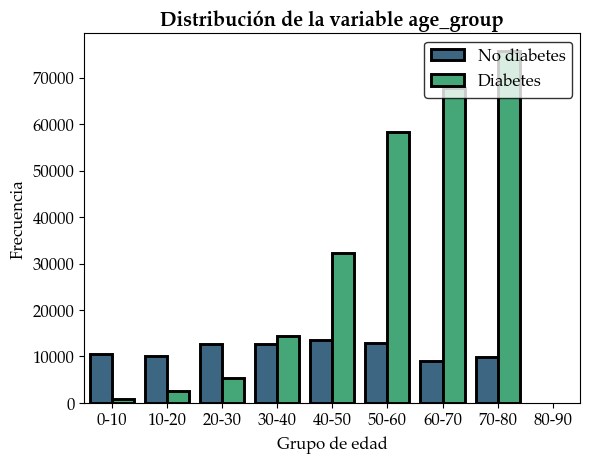

In [77]:
# Crear grupos de edad con la variable age de 0 a 90 años de 10 en 10 años
df['age_group'] = pd.cut(df['age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90], labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90'])

# Grafico de barras de la variable age_group
sns.countplot(x='age_group', data=df, palette='viridis', hue='diabetes', dodge=True, linewidth=2.1, edgecolor='black')
plt.title('Distribución de la variable age_group', fontweight='bold')
plt.xlabel('Grupo de edad')
plt.ylabel('Frecuencia')
plt.legend(['No diabetes', 'Diabetes'], loc = 'upper right', frameon = True, facecolor = 'white', edgecolor = 'black')
plt.show()

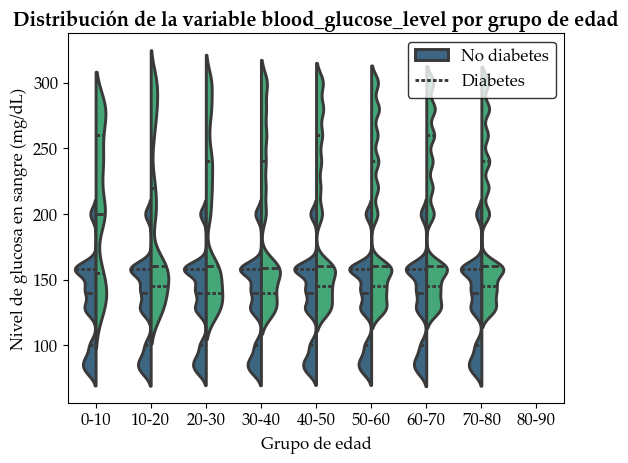

In [78]:
# Grafico de violines de la variable age_group
sns.violinplot(x='age_group', y='blood_glucose_level', data=df, palette='viridis', linewidth=2.1, hue='diabetes', split=True, inner='quartile')
plt.title('Distribución de la variable blood_glucose_level por grupo de edad', fontweight='bold')
plt.xlabel('Grupo de edad')
plt.ylabel('Nivel de glucosa en sangre (mg/dL)')
plt.legend(['No diabetes', 'Diabetes'], loc = 'upper right', frameon = True, facecolor = 'white', edgecolor = 'black')
plt.show()

# **Limpieza y Preprocesamiento de Datos**

In [85]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes', 'age_group'],
      dtype='object')

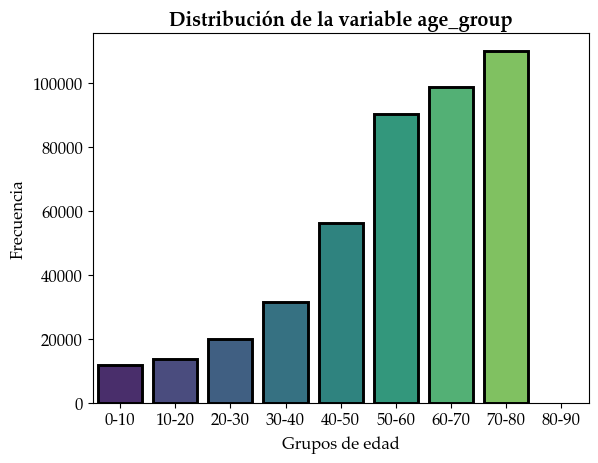

In [87]:
# crea grupos de edad de 10 en 10 años
df['age_group'] = pd.cut(df['age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90], labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90'])

# Histograma de la variable age_group
sns.countplot(x='age_group', data=df, palette='viridis', edgecolor='black', linewidth=2.1)
plt.title('Distribución de la variable age_group', fontweight='bold')
plt.xlabel('Grupos de edad')
plt.ylabel('Frecuencia')
plt.show()

In [96]:
df.isnull().sum().sort_values(ascending=False)

gender                 432000
smoking_history        432000
age                         0
hypertension                0
heart_disease               0
bmi                         0
HbA1c_level                 0
blood_glucose_level         0
diabetes                    0
age_group                   0
dtype: int64

# **Entrenamiento del Modelo**


In [66]:
# Contar valores de la variable diabetes en 0 y 1
df['diabetes'].value_counts()

diabetes
1    174500
0     91500
Name: count, dtype: int64

In [79]:
# Realizar un sobre muestreo de la clase minoritaria diabetes 1 y elegir cuantos datos se quieren
df_1 = df[df['diabetes'] == 1]
df_1_over = df_1.sample(83000, replace=True)

# Integrar los datos de 1 a df]
df_over = pd.concat([df, df_1_over], axis=0)

# Contar valores de la variable diabetes en 0 y 1
df_over['diabetes'].value_counts()

diabetes
1    340500
0     91500
Name: count, dtype: int64

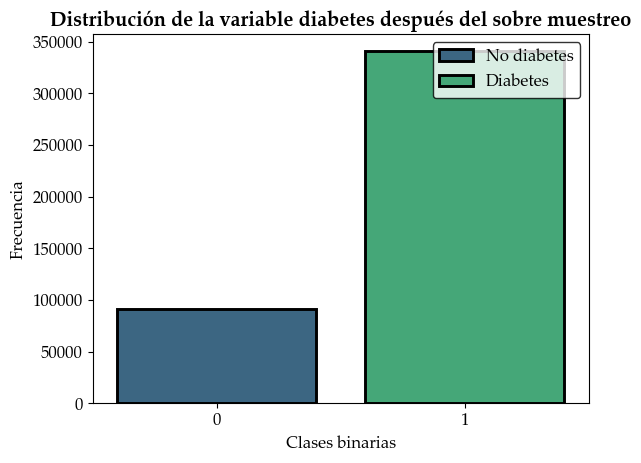

In [80]:
# Integrar los datos de 1 a df
df = pd.concat([df, df_1_over], axis=0)

# Grafico de barras de la variable diabetes despues del sobre muestreo
sns.countplot(x='diabetes', data=df, palette='viridis', edgecolor='black', linewidth=2.1)
plt.title('Distribución de la variable diabetes después del sobre muestreo', fontweight='bold')
plt.xlabel('Clases binarias')
plt.ylabel('Frecuencia')
plt.legend(['No diabetes', 'Diabetes'], loc = 'upper right', frameon = True, facecolor = 'white', edgecolor = 'black')
plt.show()

In [81]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_group
0,NaN,80.0,0,1,NaN,25.19,6.6,140,0,70-80
1,NaN,54.0,0,0,NaN,27.32,6.6,80,0,50-60
2,NaN,28.0,0,0,NaN,27.32,5.7,158,0,20-30
3,NaN,36.0,0,0,NaN,23.45,5.0,155,0,30-40
4,NaN,76.0,1,1,NaN,20.14,4.8,155,0,70-80


In [82]:
print(df['smoking_history'].unique())
print(df['gender'].unique())

[nan]
[nan]


In [83]:
# Convertir la variable smoking_history a numerica
df['smoking_history'] = df['smoking_history'].map({'never': 0, 'No Info': 1, 'current': 2, 'former': 3, 'ever': 4, 'not current': 5})

# Convertir gender a numerica
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1, 'Other': 2})

# Ver variables convertidas
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_group
0,NaN,80.0,0,1,NaN,25.19,6.6,140,0,70-80
1,NaN,54.0,0,0,NaN,27.32,6.6,80,0,50-60
2,NaN,28.0,0,0,NaN,27.32,5.7,158,0,20-30
3,NaN,36.0,0,0,NaN,23.45,5.0,155,0,30-40
4,NaN,76.0,1,1,NaN,20.14,4.8,155,0,70-80


In [89]:
# Seleccionar todas las caracteristica y la variable objetivo diabetes
# Excluir 'diabetes' y 'age_group' (que es categórica y no numérica)
X = df.drop(['diabetes', 'age_group'], axis=1)
y = df['diabetes']

# Escalar los datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

# Crear el modelo de regresion logistica
model = RandomForestClassifier()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Calcular la precision del modelo
accuracy = accuracy_score(y_test, y_pred)

# Imprimir la precision del modelo
print('Precisión del modelo:', accuracy)

# Reporte de clasificacion
print(classification_report(y_test, y_pred))

Precisión del modelo: 0.9942476851851851
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     18311
           1       0.99      1.00      1.00     68089

    accuracy                           0.99     86400
   macro avg       1.00      0.99      0.99     86400
weighted avg       0.99      0.99      0.99     86400

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     18311
           1       0.99      1.00      1.00     68089

    accuracy                           0.99     86400
   macro avg       1.00      0.99      0.99     86400
weighted avg       0.99      0.99      0.99     86400



In [90]:
# Imprimir nombres de la columna de X
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes', 'age_group'],
      dtype='object')

In [92]:
# Ver la importancia de las caracteristicas
importances = model.feature_importances_

# Crear un dataframe con las caracteristicas y su importancia
# Excluir tanto 'diabetes' como 'age_group' para que coincida con X
feature_names = df.columns.drop(['diabetes', 'age_group'])
df_importances = pd.DataFrame({'Caracteristicas': feature_names, 'Importancia': importances})

# Ordenar las caracteristicas por importancia
df_importances = df_importances.sort_values('Importancia', ascending=False)

df_importances.head()

,Caracteristicas,Importancia
6,HbA1c_level,0.360716
7,blood_glucose_level,0.274298
1,age,0.194261
5,bmi,0.146323
2,hypertension,0.016897


In [93]:
# Que hacer con las caracteristicas para lograr un mejor modelo
df_importances['Caracteristicas']

# Seleccionar todas las caracteristica y la variable objetivo diabetes  
X = df[['blood_glucose_level', 'age', 'bmi', 'HbA1c_level']]
y = df['diabetes']

# Escalar los datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

# Crear el modelo ramndom forest classifier
model = RandomForestClassifier()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Calcular la precision del modelo
accuracy = accuracy_score(y_test, y_pred)

# Imprimir la precision del modelo
print('Precisión del modelo:', accuracy)

# Reporte de clasificacion
print(classification_report(y_test, y_pred))

Precisión del modelo: 0.9934490740740741
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     18341
           1       0.99      1.00      1.00     68059

    accuracy                           0.99     86400
   macro avg       1.00      0.98      0.99     86400
weighted avg       0.99      0.99      0.99     86400



In [72]:
# Importar libreria para guardar el modelo
import pickle

# Guardar el modelo de random forest classifier y el escalador
RFM = 'Random_Forest_Model.pkl'
pickle.dump(model, open(RFM, 'wb'))

scaler_model = 'scaler.pkl'
pickle.dump(scaler, open(scaler_model, 'wb'))


In [73]:
# Cargar el modelo
model = pickle.load(open(RFM, 'rb'))

# Cargar el escalador
scaler = pickle.load(open(scaler_model, 'rb'))

In [94]:
# Crear un dataframe para hacer predicciones
data = {'blood_glucose_level': [115], 'age': [21], 'bmi': [22], 'HbA1c_level': [3.2]}
df = pd.DataFrame(data)

# Escalar los datos
df = scaler.transform(df)

# Realizar predicciones
prediction = model.predict(df)

# Calculo de la probabilidad de la prediccion
probability = model.predict_proba(df)

# Definir un 3 umbrales de diabetes en bajo, moderado y alto riesgo
bajo_riesgo = 0.33
moderado_riesgo = 0.66
alto_riesgo = 0.84

# Imprimir el umbral y la probabilidad de la prediccion
if probability[0][1] < bajo_riesgo:
    print('El paciente tiene bajo riesgo de diabetes')
elif probability[0][1] < moderado_riesgo:
    print('El paciente tiene moderado riesgo de diabetes')
elif probability[0][1] < alto_riesgo:
    print('El paciente tiene alto riesgo de diabetes')

# Imprimir la probabilidad de la prediccion en porcentaje y con dos decimales
print('Probabilidad de diabetes:', round(probability[0][1]*100, 2),'%')




El paciente tiene bajo riesgo de diabetes
Probabilidad de diabetes: 0.0 %


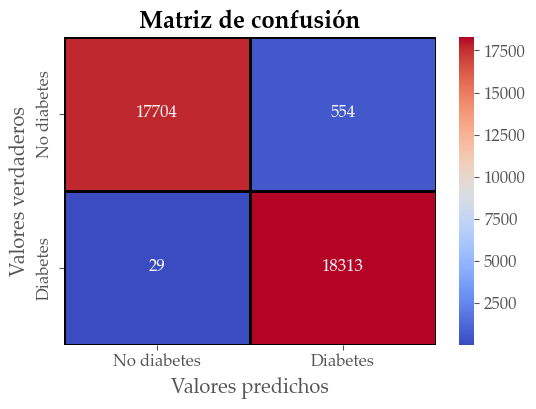

In [89]:
# Ver matriz del entrenamiento y validacion del modelo en grafico
cm = confusion_matrix(y_test, y_pred)

# Grafico de la matriz de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['No diabetes', 'Diabetes'], yticklabels=['No diabetes', 'Diabetes'], linewidths=2.1, linecolor='black', edgecolor='black')
plt.title('Matriz de confusión', fontweight='bold')
plt.xlabel('Valores predichos')
plt.ylabel('Valores verdaderos')
plt.show()

In [95]:
# Imprimir el reporte de clasifiacion y la la precision del primer entrenamiento
print('Precisión del modelo:', accuracy)
print(classification_report(y_test, y_pred))

Precisión del modelo: 0.9840710382513661
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     18258
           1       0.97      1.00      0.98     18342

    accuracy                           0.98     36600
   macro avg       0.98      0.98      0.98     36600
weighted avg       0.98      0.98      0.98     36600

